# 파이썬 기반의 AI를 위한 기초수학, 확률및통계

In [9]:
## 강봉주 
## bonjour.kang@gmail.com
##
## 확률과 확률 변수
##

In [2]:
## 주사위 1~6

import numpy as np
dice = np.arange(1,7)

## 표본공간
## 두 개의 주사위 던질 때, 모든 조합 생성
sample_space = np.array([(i,j) for i in dice for j in dice])
print(f"표본공간(총 {len(sample_space)}개)")

## 두 주사위의 합이 7인 경우 확률
sum7 = np.array([result for result in sample_space if sum(result) == 7])
sum7

표본공간(총 36개)


array([[1, 6],
       [2, 5],
       [3, 4],
       [4, 3],
       [5, 2],
       [6, 1]])

In [3]:
## 로또
# https://docs.python.org/ko/3.13/library/math.html#math.comb
from math import comb
sample_space_size = comb(45, 6)
print("표본공간 크기: ", sample_space_size)
prob = 1 / sample_space_size
print(f'확률: {prob:.10f}')

표본공간 크기:  8145060
확률: 0.0000001228


In [4]:
# 필요한 패키지
import numpy as np
import scipy
from scipy import linalg as la
import matplotlib.pyplot as plt

import scipy.stats as ss
import sympy

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic' #  Windows 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

scipy.__version__

'1.15.3'

## 확률 밀도 함수
- 확률변수가 연속형일 때, 특정 값에 정확히 도달할 확률은 0이다
  + 대신, 어떤 특정 구간 안에 있을 확률을 구한다.
  + 확률 밀도 함수는 이 구간의 확률을 적분으로 표현한 함수
- 예시
  + 키가 정확히 170cm일 확률은 0
  + p(169.5 < 키 < 170.5)

In [5]:
# 예제: 이산형 확률 밀도 함수
# 이항 분포
# 4번 시행에서 성공확률이 1/2인 경우
# 𝐴={0, 1, 2}의 확률을 계산해보자

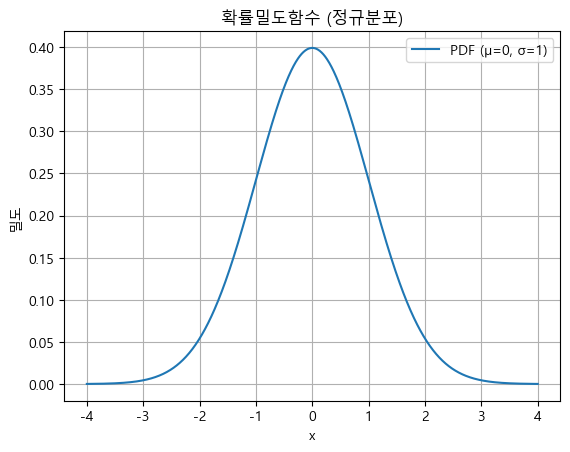

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 평균 0, 표준편차 1인 정규분포
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, loc=0, scale=1)

# 시각화
plt.plot(x, pdf, label='PDF (μ=0, σ=1)')
plt.title('확률밀도함수 (정규분포)')
plt.xlabel('x')
plt.ylabel('밀도')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
## -1 ~ 1 에 있을 확률
## p(-3 < x < 3)
# https://numpy.org/doc/2.1/reference/generated/numpy.linalg.norm.html
prob = norm.cdf(3) - norm.cdf(-3)
print(prob)

0.9973002039367398


## 문제 확률 계산
- 평균 키 = 170
- 표준편차 = 5
- 문제 : 어떤 사람의 키가 169.5 < 키 < 170.5일 확률

## 연속형 확률 밀도 함수는 구간으로 나옴 (확률을 계산할 대상이)
## 이산형 확률 밀도 함수는 숫자로 나옴 (확률을 계산할 대상이)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 평균과 표준편차
mu = 170
sigma = 5

# norm == 정규화 함수
# cdf == 누적분포함수?
prob = norm.cdf(170.5, loc=mu, scale=sigma) - norm.cdf(169.5, loc=mu, scale=sigma)
print(f'p(169.5 < 키(cm) < 170.5): {prob:.6f}')

p(169.5 < 키(cm) < 170.5): 0.079656


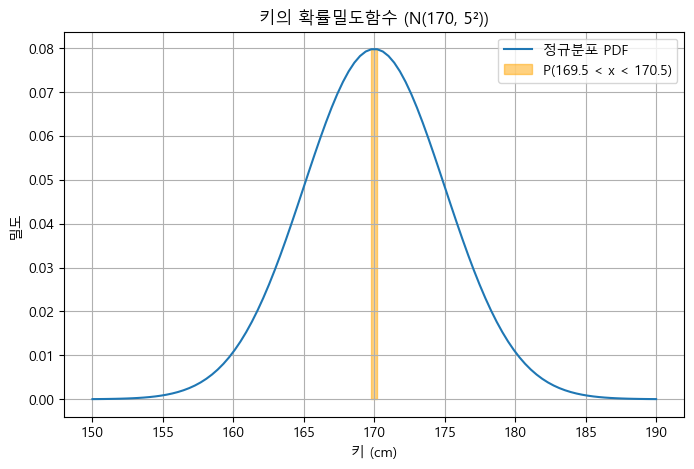

In [9]:
# x축 범위와 PDF 계산
x = np.linspace(150, 190, 100)
pdf = norm.pdf(x, loc=mu, scale=sigma)

# 객체 지향 방식
fig, ax = plt.subplots(figsize=(8, 5))

# PDF 곡선
ax.plot(x, pdf, label='정규분포 PDF')

# 확률이 해당되는 구간 채우기
ax.fill_between(x, pdf, where=(169.5 < x) & (x < 170.5), color='orange', alpha=0.5,
                label='P(169.5 < x < 170.5)')

# 제목 및 레이블 설정
ax.set_title('키의 확률밀도함수 (N(170, 5²))')
ax.set_xlabel('키 (cm)')
ax.set_ylabel('밀도')
ax.legend()
ax.grid(True)

# 그래프 출력
plt.show()

In [10]:
# 해답, 142 page
import scipy.special
A = [0, 1, 2]
trials = 4
event_prob = 1/2
np.sum(scipy.special.comb(trials, A) * event_prob ** trials)

np.float64(0.6875)

In [6]:
x = sympy.Symbol('x')
PA = sympy.integrate(sympy.exp(-x), (x, 0, sympy.oo))
PA

1

In [7]:
# 특정 이벤트의 확률 구하기
x = sympy.Symbol('x')
PA = sympy.integrate(sympy.exp(-x), (x, 0, 1))
PA

1 - exp(-1)

# 균등분포
- 정의: 모든 값이 동일한 확률로 나타나는 확률분포
- 종류: 이산 균등분포, 연속 균등분포
  + 이산 균등분포의 예) 주사위: 정수 1~6이 각각 독같은 확률로 나옴
  + 연속 균등분포 : 실수 구간 [a,b]에서 무작위 추출
- 문제: 내가 평균적으로 버스를 몇분 기다려야 합니까? 라는 문제에 적합함
  + 버스를 기다리는 시간은 0~10분, 그 사이의 균등분포를 따른다고 가정 (배차시간 0~10분 사이에는 출발)
  + 승객은 평균적으로 몇분 기다리는가?
- 기대값 E[X] === 적분 ===> 분산값 var(x) = (b-a)^2 / 12
  + 모든 값을 균일하게 포함, 전체 길이 구간(b-a)에 따라 확산 정도(분산)가 결정된다.
  + 분산은 단순히 제곱 폭만큼 퍼지지 않는다. (왜냐. 12로 나누기 때문)
  + 

기댓값 E[X]: 5.0
분산 Var[X]: 8.3333


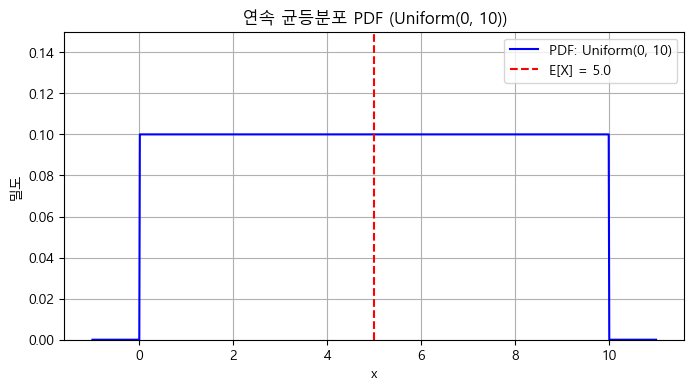

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# 균등분포 정의, 0~10
a = 0
b = 10
x = np.linspace(a-1, b+1, 1000) # 1000개의 데이터를 의미
pdf = uniform.pdf(x, loc = a, scale=(b-a))

# 기대값
expected = (a+b)/2 # 평균
variance = ((b-a)**2)/12 #분산

print(f"기댓값 E[X]: {expected}")
print(f"분산 Var[X]: {variance:.4f}")

# 시각화
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, pdf, label='PDF: Uniform(0, 10)', color='blue')
ax.axvline(expected, color='red', linestyle='--', label=f'E[X] = {expected}')
ax.set_title('연속 균등분포 PDF (Uniform(0, 10))')
ax.set_xlabel('x')
ax.set_ylabel('밀도')
ax.set_ylim(0, 0.15)
ax.legend()
ax.grid(True)
plt.show()

In [8]:
# 예제: 균등 분포의 분포함수
# 1) 구간 [0, 1]에서 정의된 균등 분포의 분포 함수를
# 정의하세요
# 2) 분포 함수를 x값에 따른 그래프를 그리세요

In [9]:
# 해답
#1)
a, b, x = sympy.symbols('a, b, x')
x = sympy.Symbol('x')
F = sympy.Lambda((x, a, b), x/(b-a))
F(x, 0, 1)

x

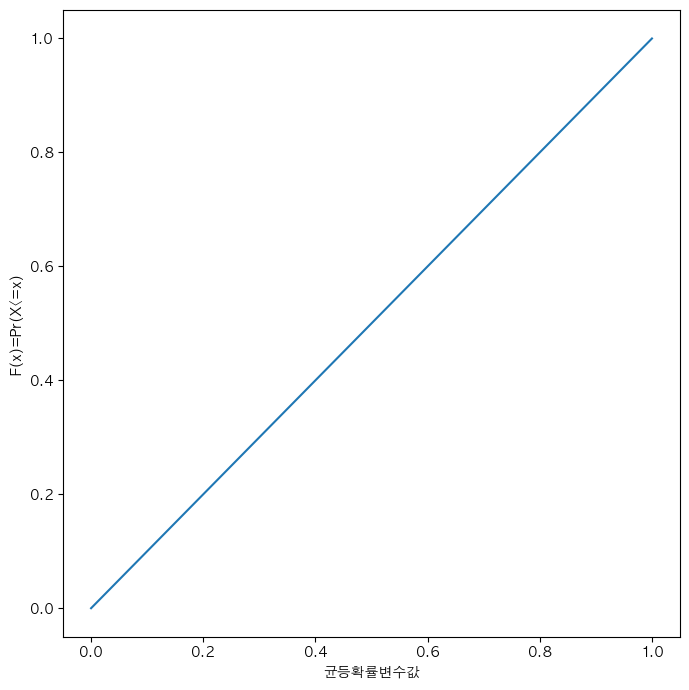

In [10]:
# 2)
x = np.linspace(0,1, 100)
cdf_x = x

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, cdf_x)
ax.set_xlabel("균등확률변수값")
ax.set_ylabel("F(x)=Pr(X<=x)")

plt.tight_layout()

In [11]:
# 균등 분포의 기대값 구하기
x = sympy.Symbol('x')
mu = sympy.integrate(x*1/2, (x, -1, 1))
mu

0

In [12]:
# 분산 구하기
EX2 = sympy.integrate(x**2*1/2, (x, -1, 1))
EX2

1/3

In [13]:
sigma2 = EX2 - mu**2
sigma2

1/3

In [14]:
sigma = sympy.sqrt(sigma2)
sigma

sqrt(3)/3

In [15]:
# 기대값
import sympy

a, b, x = sympy.symbols('a, b, x')
mu = sympy.integrate(x/(b-a), (x, a, b))
mu.simplify().together()

(a + b)/2

In [16]:
# 제곱 기대값
EX2 = sympy.integrate(x**2/(b-a), (x, a, b))
EX2.simplify().factor()

(a**2 + a*b + b**2)/3

In [17]:
# 분산 계산
sigma2 = EX2 - mu**2
sigma2.simplify().factor()

(a - b)**2/12

In [18]:
# 적률 함수를 이용한 평균, 분산 구하기
mu, sigma, t = sympy.symbols('mu, sigma, t')
m_gen= sympy.exp(mu*t + (sigma**2 * t**2)/2)
# 1차 적률 구하기
m_gen.diff(t)

(mu + sigma**2*t)*exp(mu*t + sigma**2*t**2/2)

In [19]:
# 1차 적률: t=0
m_gen_func = sympy.Lambda(t, m_gen.diff(t))
EX = m_gen_func(0)
EX

mu

In [20]:
# 2차 적률 구하기
m_gen.diff(t, 2)

(sigma**2 + (mu + sigma**2*t)**2)*exp(t*(mu + sigma**2*t/2))

In [21]:
m_gen_func = sympy.Lambda(t, m_gen.diff(t, 2))
# 2차 적률: t=0
EX2 = m_gen_func(0)
EX2

mu**2 + sigma**2

In [22]:
# 분산
EX2 - EX**2

sigma**2